<a href="https://colab.research.google.com/github/debchi108/Deep_learning/blob/main/Deep_learning_first_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!ls -lah
!ls -lah MNIST.zip utils.py


total 19M
drwxr-xr-x 1 root root 4.0K Feb  6 19:00 .
drwxr-xr-x 1 root root 4.0K Feb  6 18:49 ..
drwxr-xr-x 4 root root 4.0K Jan 16 14:24 .config
-rw-r--r-- 1 root root  18M Feb  6 19:00 MNIST.zip
drwxr-xr-x 1 root root 4.0K Jan 16 14:24 sample_data
-rw-r--r-- 1 root root 4.2K Feb  6 19:00 utils.py
-rw-r--r-- 1 root root  18M Feb  6 19:00 MNIST.zip
-rw-r--r-- 1 root root 4.2K Feb  6 19:00 utils.py


In [4]:
!unzip -l MNIST.zip | head -n 40


Archive:  MNIST.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of MNIST.zip or
        MNIST.zip.zip, and cannot find MNIST.zip.ZIP, period.


In [7]:
!find mnist_data -type d -name "train" -o -type d -name "test"


In [5]:
!rm -rf mnist_data train test
!mkdir -p mnist_data
!unzip -q MNIST.zip -d mnist_data
!ls -lah mnist_data | head -n 50


total 12K
drwxr-xr-x 3 root root 4.0K Feb  6 19:00 .
drwxr-xr-x 1 root root 4.0K Feb  6 19:00 ..
drwxr-xr-x 4 root root 4.0K Feb 27  2019 MNIST


In [6]:
!find mnist_data -type d -name "train" -o -type d -name "test"


In [7]:
!ls -lah MNIST.zip


-rw-r--r-- 1 root root 32M Feb  6 19:00 MNIST.zip


In [9]:
!unzip -l MNIST.zip | head -n 60


Archive:  MNIST.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2019-02-27 13:40   MNIST/
       49  2019-02-27 13:38   MNIST/readme.txt
        0  2019-02-27 13:39   MNIST/Test/
        0  2019-02-27 13:39   MNIST/Train/
        0  2019-02-27 13:40   MNIST/Test/2/
      215  2019-02-27 13:40   MNIST/Test/2/0654.png
      214  2019-02-27 13:40   MNIST/Test/2/0673.png
      381  2019-02-27 13:40   MNIST/Test/2/0659.png
      367  2019-02-27 13:40   MNIST/Test/2/0711.png
      317  2019-02-27 13:40   MNIST/Test/2/0718.png
      326  2019-02-27 13:40   MNIST/Test/2/0771.png
      374  2019-02-27 13:40   MNIST/Test/2/0009.png
      297  2019-02-27 13:40   MNIST/Test/2/0820.png
      352  2019-02-27 13:40   MNIST/Test/2/0284.png
      304  2019-02-27 13:40   MNIST/Test/2/0090.png
      323  2019-02-27 13:40   MNIST/Test/2/0998.png
      301  2019-02-27 13:40   MNIST/Test/2/0845.png
      251  2019-02-27 13:40   MNIST/Test/2/0256.png
      365  2019-02-27

In [10]:
!rm -rf MNIST
!unzip -q MNIST.zip
!ls -lah
!ls -lah MNIST | head
!ls -lah MNIST/Train | head
!ls -lah MNIST/Test | head


total 32M
drwxr-xr-x 1 root root 4.0K Feb  6 19:05 .
drwxr-xr-x 1 root root 4.0K Feb  6 18:49 ..
drwxr-xr-x 4 root root 4.0K Jan 16 14:24 .config
drwxr-xr-x 4 root root 4.0K Feb 27  2019 MNIST
drwxr-xr-x 3 root root 4.0K Feb  6 19:00 mnist_data
-rw-r--r-- 1 root root  32M Feb  6 19:00 MNIST.zip
drwxr-xr-x 1 root root 4.0K Jan 16 14:24 sample_data
-rw-r--r-- 1 root root 4.2K Feb  6 19:00 utils.py
total 20K
drwxr-xr-x  4 root root 4.0K Feb 27  2019 .
drwxr-xr-x  1 root root 4.0K Feb  6 19:05 ..
-rw-r--r--  1 root root   49 Feb 27  2019 readme.txt
drwxr-xr-x 12 root root 4.0K Feb 27  2019 Test
drwxr-xr-x 12 root root 4.0K Feb 27  2019 Train
total 1.4M
drwxr-xr-x 12 root root 4.0K Feb 27  2019 .
drwxr-xr-x  4 root root 4.0K Feb 27  2019 ..
drwxr-xr-x  2 root root 132K Feb 27  2019 0
drwxr-xr-x  2 root root 132K Feb 27  2019 1
drwxr-xr-x  2 root root 132K Feb 27  2019 2
drwxr-xr-x  2 root root 132K Feb 27  2019 3
drwxr-xr-x  2 root root 132K Feb 27  2019 4
drwxr-xr-x  2 root root 132K Feb 2

In [11]:
!rm -rf train test
!ln -s MNIST/Train train
!ln -s MNIST/Test  test

!find train -type f -name "*.png" | head
!find train -type f -name "*.png" | wc -l


0


In [14]:
import numpy as np
from utils import load_mnist

print("Loading MNIST data...")
X_train, Y_train, X_test, Y_test = load_mnist()

print("✓ Data loaded successfully!")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape :", X_test.shape)
print("Y_test shape :", Y_test.shape)


Loading MNIST data...
✓ Data loaded successfully!
X_train shape: (60000, 784)
Y_train shape: (60000, 10)
X_test shape : (10000, 784)
Y_test shape : (10000, 10)


Linear model training code (mini-batch gradient descent):

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Core functions (linear classifier) ----------

def initialize_linear(D_i=784, D_o=10, seed=0):
    rng = np.random.default_rng(seed)
    # Small random init (works fine for linear classifier)
    W = 0.01 * rng.standard_normal((D_i, D_o))
    b = np.zeros((D_o,))
    return W, b

def forward_pass(X, W, b):
    return X @ W + b  # (N,10)

def softmax(F):
    F_shift = F - np.max(F, axis=1, keepdims=True)  # stability
    expF = np.exp(F_shift)
    return expF / np.sum(expF, axis=1, keepdims=True)

def compute_cost(F, Y):
    P = softmax(F)
    eps = 1e-12
    return -np.mean(np.sum(Y * np.log(P + eps), axis=1))

def d_cost_d_output(F, Y):
    P = softmax(F)
    N = Y.shape[0]
    return (P - Y) / N

def backward_pass(X, F, Y):
    dF = d_cost_d_output(F, Y)      # (N,10)
    dW = X.T @ dF                   # (784,10)
    db = np.sum(dF, axis=0)         # (10,)
    return dW, db

def update_parameters(W, b, dW, db, lr):
    W = W - lr * dW
    b = b - lr * db
    return W, b

def accuracy(X, Y, W, b):
    F = forward_pass(X, W, b)
    P = softmax(F)
    y_pred = np.argmax(P, axis=1)
    y_true = np.argmax(Y, axis=1)
    return np.mean(y_pred == y_true)

# ---------- Mini-batches ----------
def random_mini_batches(X, Y, batch_size, seed=0):
    rng = np.random.default_rng(seed)
    N = X.shape[0]
    perm = rng.permutation(N)
    Xs = X[perm]
    Ys = Y[perm]
    batches = []
    for start in range(0, N, batch_size):
        end = min(start + batch_size, N)
        batches.append((Xs[start:end], Ys[start:end]))
    return batches

# ---------- Training loop ----------
def train_linear_model(X_train, Y_train, X_test, Y_test,
                       num_epochs=20, learning_rate=0.1, batch_size=128, seed=0,
                       eval_every=1):
    W, b = initialize_linear(D_i=X_train.shape[1], D_o=Y_train.shape[1], seed=seed)

    train_costs, test_costs = [], []
    train_accs, test_accs = [], []

    for epoch in range(1, num_epochs + 1):
        batches = random_mini_batches(X_train, Y_train, batch_size=batch_size, seed=seed+epoch)

        # train over all batches
        for Xb, Yb in batches:
            Fb = forward_pass(Xb, W, b)
            dW, db = backward_pass(Xb, Fb, Yb)
            W, b = update_parameters(W, b, dW, db, learning_rate)

        # evaluate once per epoch (or every eval_every epochs)
        if epoch % eval_every == 0:
            F_train = forward_pass(X_train[:batch_size], W, b)  # current-mini-batch-ish proxy
            train_cost = compute_cost(F_train, Y_train[:batch_size])
            test_cost  = compute_cost(forward_pass(X_test, W, b), Y_test)

            train_acc = accuracy(X_train[:batch_size], Y_train[:batch_size], W, b)
            test_acc  = accuracy(X_test, Y_test, W, b)

            train_costs.append(train_cost)
            test_costs.append(test_cost)
            train_accs.append(train_acc)
            test_accs.append(test_acc)

            print(f"Epoch {epoch:3d} | train cost {train_cost:.4f} acc {train_acc:.4f} | "
                  f"test cost {test_cost:.4f} acc {test_acc:.4f}")

    history = {
        "train_costs": np.array(train_costs),
        "test_costs": np.array(test_costs),
        "train_accs": np.array(train_accs),
        "test_accs": np.array(test_accs),
        "num_epochs": num_epochs,
        "learning_rate": learning_rate,
        "batch_size": batch_size
    }
    return W, b, history


: Train it (start with safe hyperparameters):

In [16]:
W_lin, b_lin, hist_lin = train_linear_model(
    X_train, Y_train, X_test, Y_test,
    num_epochs=20,
    learning_rate=0.1,
    batch_size=128
)


Epoch   1 | train cost 0.2484 acc 0.9375 | test cost 0.3785 acc 0.8999
Epoch   2 | train cost 0.2214 acc 0.9375 | test cost 0.3355 acc 0.9089
Epoch   3 | train cost 0.2191 acc 0.9375 | test cost 0.3169 acc 0.9137
Epoch   4 | train cost 0.2165 acc 0.9375 | test cost 0.3060 acc 0.9161
Epoch   5 | train cost 0.1916 acc 0.9453 | test cost 0.2988 acc 0.9172
Epoch   6 | train cost 0.1874 acc 0.9531 | test cost 0.2936 acc 0.9181
Epoch   7 | train cost 0.1671 acc 0.9609 | test cost 0.2902 acc 0.9196
Epoch   8 | train cost 0.1767 acc 0.9531 | test cost 0.2865 acc 0.9197
Epoch   9 | train cost 0.1898 acc 0.9531 | test cost 0.2850 acc 0.9203
Epoch  10 | train cost 0.1811 acc 0.9531 | test cost 0.2836 acc 0.9213
Epoch  11 | train cost 0.1565 acc 0.9688 | test cost 0.2817 acc 0.9223
Epoch  12 | train cost 0.1853 acc 0.9453 | test cost 0.2792 acc 0.9231
Epoch  13 | train cost 0.1790 acc 0.9531 | test cost 0.2805 acc 0.9215
Epoch  14 | train cost 0.1683 acc 0.9609 | test cost 0.2772 acc 0.9225
Epoch 

Make the required plot (cost + accuracy vs epochs):

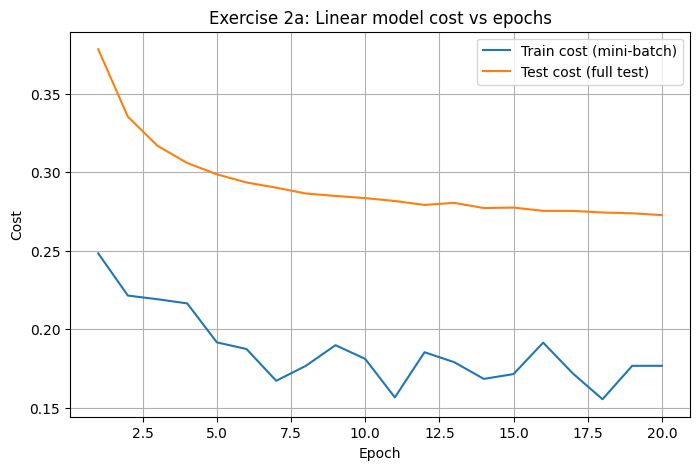

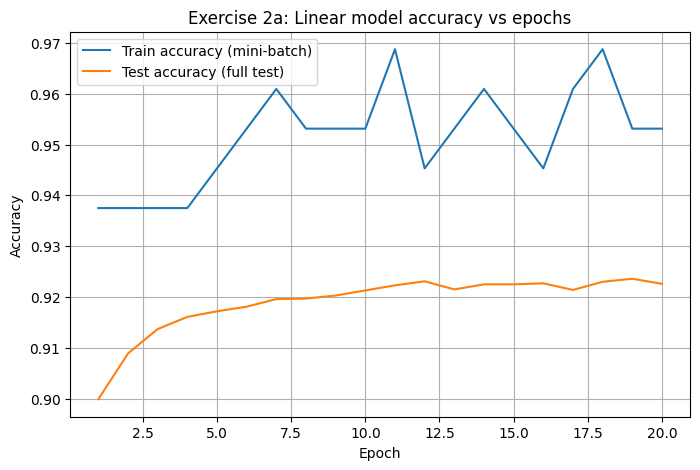

In [17]:
epochs = np.arange(1, len(hist_lin["train_costs"]) + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, hist_lin["train_costs"], label="Train cost (mini-batch)")
plt.plot(epochs, hist_lin["test_costs"], label="Test cost (full test)")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Exercise 2a: Linear model cost vs epochs")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(epochs, hist_lin["train_accs"], label="Train accuracy (mini-batch)")
plt.plot(epochs, hist_lin["test_accs"], label="Test accuracy (full test)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Exercise 2a: Linear model accuracy vs epochs")
plt.legend()
plt.grid(True)
plt.show()


Add multi-layer model:

In [26]:
import numpy as np

# ---------------- Activations ----------------
def relu(Z):
    return np.maximum(0, Z)

def drelu(Z):
    return (Z > 0).astype(Z.dtype)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def dsigmoid(Z):
    S = sigmoid(Z)
    return S * (1 - S)

# ---------------- Softmax + CE ----------------
def softmax(F):
    F_shift = F - np.max(F, axis=1, keepdims=True)
    expF = np.exp(F_shift)
    return expF / np.sum(expF, axis=1, keepdims=True)

def compute_cost_from_logits(F, Y):
    P = softmax(F)
    eps = 1e-12
    return -np.mean(np.sum(Y * np.log(P + eps), axis=1))

def d_cost_d_logits(F, Y):
    # dL/dF = (P - Y)/N
    P = softmax(F)
    N = Y.shape[0]
    return (P - Y) / N

# ---------------- Initialize (He for ReLU) ----------------
def initialize_parameters(layer_sizes, activation="relu", seed=0):
    """
    layer_sizes: list like [784, 128, 10]
    returns params dict: {"W1":..., "b1":..., ..., "WL":..., "bL":...}
    """
    rng = np.random.default_rng(seed)
    params = {}
    L = len(layer_sizes) - 1  # number of layers with weights

    for l in range(1, L + 1):
        n_in = layer_sizes[l-1]
        n_out = layer_sizes[l]

        if activation == "relu" and l != L:
            # He init for hidden layers if ReLU
            W = rng.standard_normal((n_in, n_out)) * np.sqrt(2.0 / n_in)
        else:
            # small random init otherwise
            W = 0.01 * rng.standard_normal((n_in, n_out))

        b = np.zeros((n_out,))
        params[f"W{l}"] = W
        params[f"b{l}"] = b

    return params

# ---------------- Forward pass ----------------
def forward_pass_nn(X, params, activation="relu"):
    """
    X: (N, D)
    returns:
      F: logits of last layer (N,10)
      cache: list of layer caches for backprop
    """
    cache = []
    A = X
    L = len(params) // 2

    for l in range(1, L):
        W = params[f"W{l}"]
        b = params[f"b{l}"]
        Z = A @ W + b
        if activation == "relu":
            A_next = relu(Z)
        elif activation == "sigmoid":
            A_next = sigmoid(Z)
        else:
            raise ValueError("activation must be 'relu' or 'sigmoid'")
        cache.append((A, W, b, Z))  # store what we need for backward
        A = A_next

    # Last layer (linear logits)
    WL = params[f"W{L}"]
    bL = params[f"b{L}"]
    F = A @ WL + bL
    cache.append((A, WL, bL, None))  # Z not needed for last linear
    return F, cache

def backward_pass_nn(F, Y, cache, activation="relu"):
    """
    Backprop for an L-layer fully connected network.

    Inputs:
      F: logits from the final layer, shape (N, 10)
      Y: one-hot labels, shape (N, 10)
      cache: list of caches from forward_pass_nn
             For layers 1..L-1: (A_prev, W, b, Z)
             For layer L:       (A_prev, W, b, None)
      activation: 'relu' or 'sigmoid' for hidden layers

    Returns:
      grads: dict with keys dW1..dWL and db1..dbL
    """
    grads = {}
    L = len(cache)  # number of layers with weights

    # ---- Start at output: dL/dF ----
    dF = d_cost_d_logits(F, Y)  # (N, 10)

    # ---- Last layer gradients ----
    A_prev, W, b, _ = cache[-1]           # last layer cache: (A_prev, WL, bL, None)
    grads[f"dW{L}"] = A_prev.T @ dF       # (n_{L-1}, 10)
    grads[f"db{L}"] = np.sum(dF, axis=0)  # (10,)

    # Gradient flowing back into previous activation
    dA = dF @ W.T                         # (N, n_{L-1})

    # ---- Hidden layers: L-1 down to 1 ----
    for l in range(L-1, 0, -1):
        A_prev, W, b, Z = cache[l-1]  # hidden layer cache: (A_prev, Wl, bl, Zl)

        # Convert dA to dZ using activation derivative
        if activation == "relu":
            dZ = dA * drelu(Z)
        elif activation == "sigmoid":
            dZ = dA * dsigmoid(Z)
        else:
            raise ValueError("activation must be 'relu' or 'sigmoid'")

        # Gradients for this layer parameters
        grads[f"dW{l}"] = A_prev.T @ dZ
        grads[f"db{l}"] = np.sum(dZ, axis=0)

        # Propagate gradient backwards (if not at first layer)
        if l > 1:
            dA = dZ @ W.T

    return grads


# ---------------- Update ----------------
def update_parameters_nn(params, grads, lr):
    L = len(params) // 2
    for l in range(1, L+1):
        params[f"W{l}"] -= lr * grads[f"dW{l}"]
        params[f"b{l}"] -= lr * grads[f"db{l}"]
    return params

# ---------------- Accuracy ----------------
def accuracy_nn(X, Y, params, activation="relu"):
    F, _ = forward_pass_nn(X, params, activation=activation)
    P = softmax(F)
    y_pred = np.argmax(P, axis=1)
    y_true = np.argmax(Y, axis=1)
    return np.mean(y_pred == y_true)


Training function for multi-layer:

In [27]:
def random_mini_batches(X, Y, batch_size, seed=0):
    rng = np.random.default_rng(seed)
    N = X.shape[0]
    perm = rng.permutation(N)
    Xs = X[perm]
    Ys = Y[perm]
    batches = []
    for start in range(0, N, batch_size):
        end = min(start + batch_size, N)
        batches.append((Xs[start:end], Ys[start:end]))
    return batches

def train_nn(X_train, Y_train, X_test, Y_test,
             layer_sizes, activation="relu",
             num_epochs=20, learning_rate=0.1, batch_size=128, seed=0):

    params = initialize_parameters(layer_sizes, activation=activation, seed=seed)

    train_costs, test_costs = [], []
    train_accs, test_accs = [], []

    for epoch in range(1, num_epochs+1):
        batches = random_mini_batches(X_train, Y_train, batch_size=batch_size, seed=seed+epoch)

        for Xb, Yb in batches:
            F, cache = forward_pass_nn(Xb, params, activation=activation)
            grads = backward_pass_nn(F, Yb, cache, activation=activation)   # new
            params = update_parameters_nn(params, grads, learning_rate)


        # evaluate once per epoch
        train_cost = compute_cost_from_logits(*forward_pass_nn(X_train[:batch_size], params, activation=activation), Y_train[:batch_size])[0] \
            if False else compute_cost_from_logits(forward_pass_nn(X_train[:batch_size], params, activation=activation)[0], Y_train[:batch_size])

        test_cost = compute_cost_from_logits(forward_pass_nn(X_test, params, activation=activation)[0], Y_test)
        train_acc = accuracy_nn(X_train[:batch_size], Y_train[:batch_size], params, activation=activation)
        test_acc  = accuracy_nn(X_test, Y_test, params, activation=activation)

        train_costs.append(train_cost)
        test_costs.append(test_cost)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        print(f"[{activation}] Epoch {epoch:3d} | train cost {train_cost:.4f} acc {train_acc:.4f} | "
              f"test cost {test_cost:.4f} acc {test_acc:.4f}")

    history = {
        "train_costs": np.array(train_costs),
        "test_costs": np.array(test_costs),
        "train_accs": np.array(train_accs),
        "test_accs": np.array(test_accs),
        "layer_sizes": layer_sizes,
        "activation": activation,
        "learning_rate": learning_rate,
        "batch_size": batch_size,
        "num_epochs": num_epochs
    }
    return params, history


Relu and sigmoid:

Relu:

In [28]:
params_relu, hist_relu = train_nn(
    X_train, Y_train, X_test, Y_test,
    layer_sizes=[784, 128, 10],
    activation="relu",
    num_epochs=20,
    learning_rate=0.1,
    batch_size=128,
    seed=1
)


[relu] Epoch   1 | train cost 0.2294 acc 0.9297 | test cost 0.3220 acc 0.9058
[relu] Epoch   2 | train cost 0.2338 acc 0.9297 | test cost 0.2592 acc 0.9265
[relu] Epoch   3 | train cost 0.1866 acc 0.9453 | test cost 0.2253 acc 0.9358
[relu] Epoch   4 | train cost 0.1448 acc 0.9609 | test cost 0.1954 acc 0.9429
[relu] Epoch   5 | train cost 0.1272 acc 0.9688 | test cost 0.1756 acc 0.9474
[relu] Epoch   6 | train cost 0.1012 acc 0.9688 | test cost 0.1537 acc 0.9554
[relu] Epoch   7 | train cost 0.0904 acc 0.9766 | test cost 0.1404 acc 0.9588
[relu] Epoch   8 | train cost 0.0974 acc 0.9766 | test cost 0.1307 acc 0.9629
[relu] Epoch   9 | train cost 0.0855 acc 0.9766 | test cost 0.1286 acc 0.9624
[relu] Epoch  10 | train cost 0.0704 acc 0.9766 | test cost 0.1134 acc 0.9675
[relu] Epoch  11 | train cost 0.0698 acc 0.9766 | test cost 0.1070 acc 0.9691
[relu] Epoch  12 | train cost 0.0720 acc 0.9766 | test cost 0.1039 acc 0.9690
[relu] Epoch  13 | train cost 0.0467 acc 0.9844 | test cost 0.09

Sigmoid:

In [21]:
params_sig, hist_sig = train_nn(
    X_train, Y_train, X_test, Y_test,
    layer_sizes=[784, 128, 10],
    activation="sigmoid",
    num_epochs=20,
    learning_rate=0.1,   # if unstable, we reduce to 0.05 or 0.01
    batch_size=128,
    seed=1
)


[sigmoid] Epoch   1 | train cost 0.5654 acc 0.9062 | test cost 0.8756 acc 0.7692
[sigmoid] Epoch   2 | train cost 0.3698 acc 0.9062 | test cost 0.4808 acc 0.8732
[sigmoid] Epoch   3 | train cost 0.3082 acc 0.9297 | test cost 0.3824 acc 0.8970
[sigmoid] Epoch   4 | train cost 0.2510 acc 0.9375 | test cost 0.3383 acc 0.9047
[sigmoid] Epoch   5 | train cost 0.2370 acc 0.9375 | test cost 0.3143 acc 0.9087
[sigmoid] Epoch   6 | train cost 0.2054 acc 0.9531 | test cost 0.2973 acc 0.9140
[sigmoid] Epoch   7 | train cost 0.2162 acc 0.9531 | test cost 0.2833 acc 0.9178
[sigmoid] Epoch   8 | train cost 0.2255 acc 0.9453 | test cost 0.2735 acc 0.9208
[sigmoid] Epoch   9 | train cost 0.2069 acc 0.9531 | test cost 0.2666 acc 0.9239
[sigmoid] Epoch  10 | train cost 0.1815 acc 0.9609 | test cost 0.2566 acc 0.9260
[sigmoid] Epoch  11 | train cost 0.2058 acc 0.9609 | test cost 0.2479 acc 0.9294
[sigmoid] Epoch  12 | train cost 0.1932 acc 0.9609 | test cost 0.2425 acc 0.9300
[sigmoid] Epoch  13 | train 

In [29]:
print("ReLU final test accuracy:", hist_relu["test_accs"][-1])
print("ReLU final test cost:", hist_relu["test_costs"][-1])

print("Sigmoid final test accuracy:", hist_sig["test_accs"][-1])
print("Sigmoid final test cost:", hist_sig["test_costs"][-1])


ReLU final test accuracy: 0.976
ReLU final test cost: 0.08011520754970695
Sigmoid final test accuracy: 0.9429
Sigmoid final test cost: 0.19322411674330814


Plot:

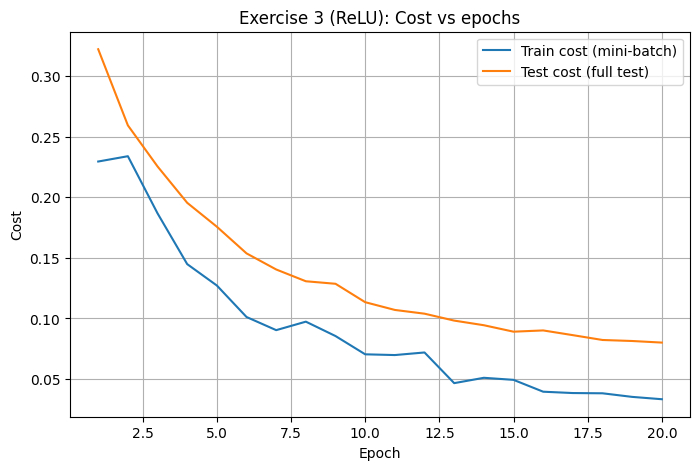

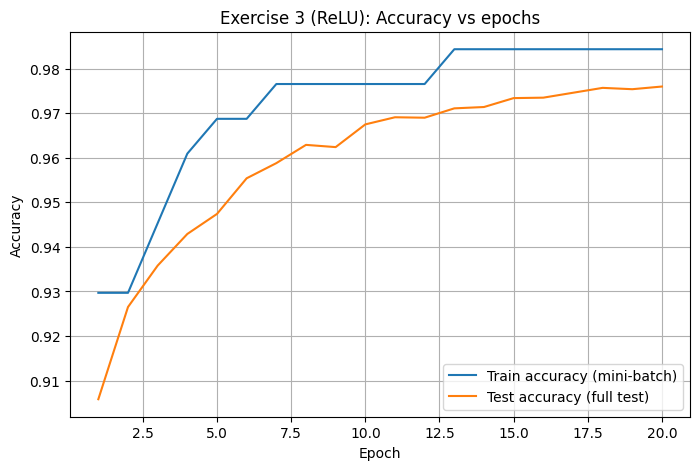

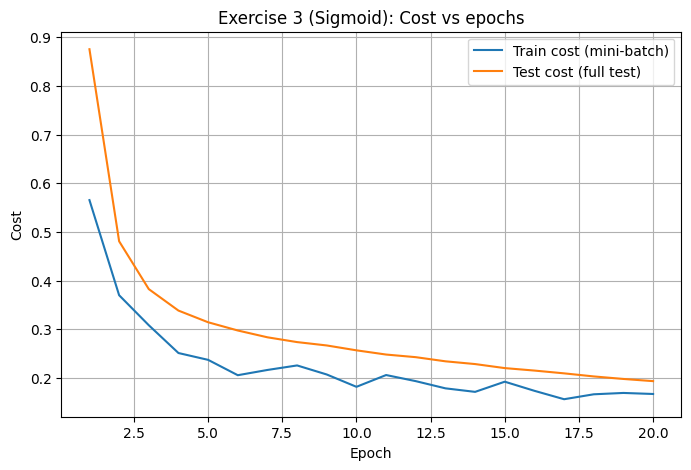

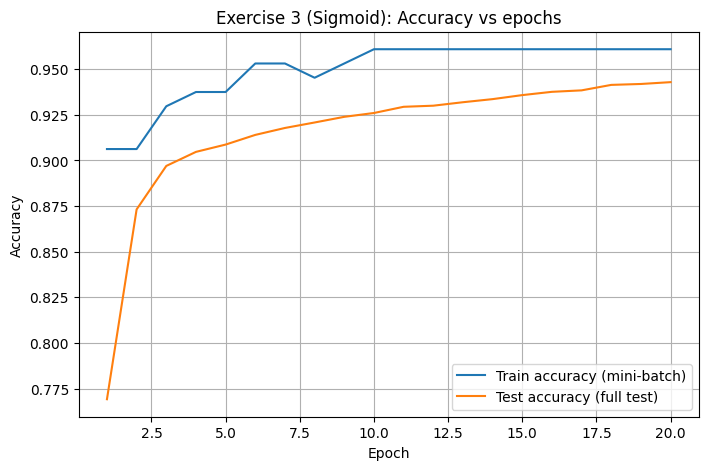

In [22]:
def plot_history(hist, title_prefix):
    epochs = np.arange(1, len(hist["train_costs"])+1)

    plt.figure(figsize=(8,5))
    plt.plot(epochs, hist["train_costs"], label="Train cost (mini-batch)")
    plt.plot(epochs, hist["test_costs"], label="Test cost (full test)")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.title(f"{title_prefix}: Cost vs epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8,5))
    plt.plot(epochs, hist["train_accs"], label="Train accuracy (mini-batch)")
    plt.plot(epochs, hist["test_accs"], label="Test accuracy (full test)")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title_prefix}: Accuracy vs epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(hist_relu, "Exercise 3 (ReLU)")
plot_history(hist_sig, "Exercise 3 (Sigmoid)")


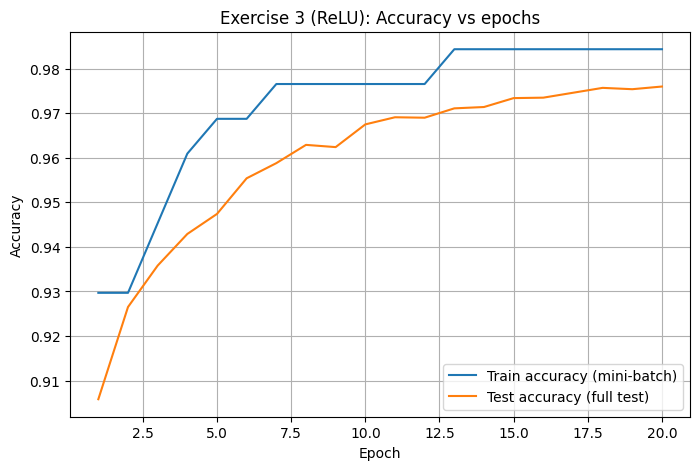

In [30]:
# Example: save ReLU accuracy plot
plt.figure(figsize=(8,5))
epochs = np.arange(1, len(hist_relu["train_accs"]) + 1)
plt.plot(epochs, hist_relu["train_accs"], label="Train accuracy (mini-batch)")
plt.plot(epochs, hist_relu["test_accs"], label="Test accuracy (full test)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Exercise 3 (ReLU): Accuracy vs epochs")
plt.legend()
plt.grid(True)
plt.savefig("fig_relu_accuracy.png", dpi=200, bbox_inches="tight")
plt.show()


Linear model cost plot: hist_lin

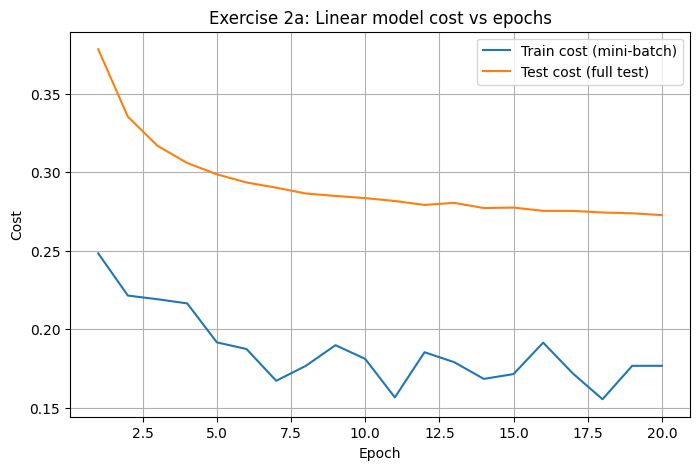

In [33]:
plt.figure(figsize=(8,5))
epochs = np.arange(1, len(hist_lin["train_costs"]) + 1)

plt.plot(epochs, hist_lin["train_costs"], label="Train cost (mini-batch)")
plt.plot(epochs, hist_lin["test_costs"], label="Test cost (full test)")

plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Exercise 2a: Linear model cost vs epochs")
plt.legend()
plt.grid(True)

plt.savefig("fig_linear_cost.png", dpi=200, bbox_inches="tight")
plt.show()


Linear model accuracy plot: hist_lin

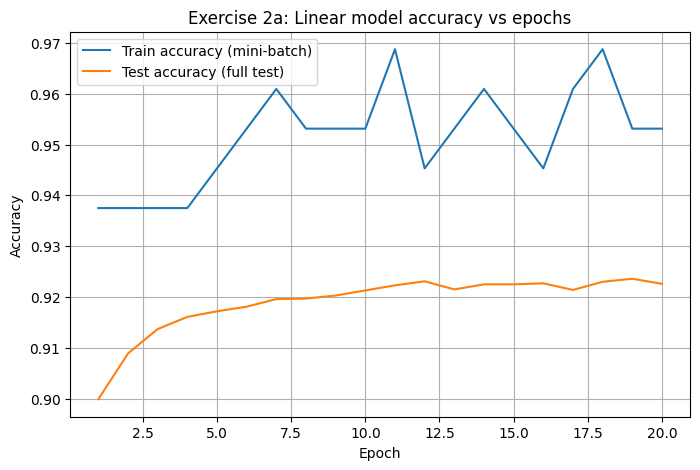

In [34]:
plt.figure(figsize=(8,5))
epochs = np.arange(1, len(hist_lin["train_accs"]) + 1)

plt.plot(epochs, hist_lin["train_accs"], label="Train accuracy (mini-batch)")
plt.plot(epochs, hist_lin["test_accs"], label="Test accuracy (full test)")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Exercise 2a: Linear model accuracy vs epochs")
plt.legend()
plt.grid(True)

plt.savefig("fig_linear_acc.png", dpi=200, bbox_inches="tight")
plt.show()

2b. Weight visualisation: W_lin

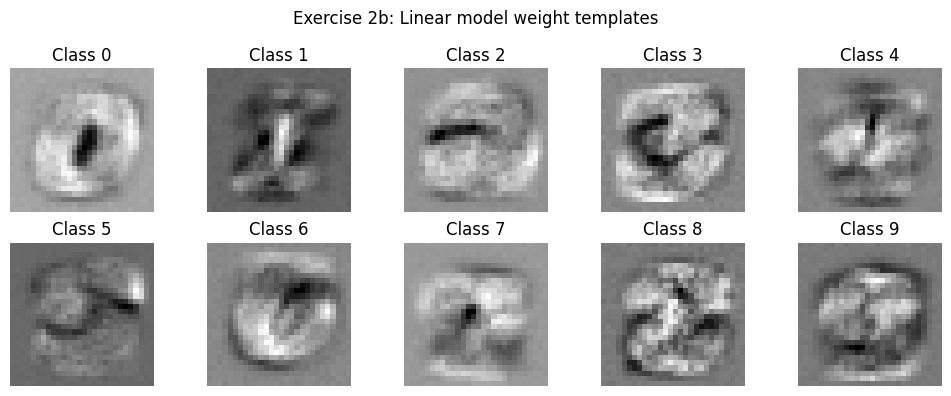

In [35]:
plt.figure(figsize=(10,4))
for k in range(10):
    wk = W_lin[:, k].reshape(28, 28)
    plt.subplot(2, 5, k+1)
    plt.imshow(wk, cmap="gray")
    plt.title(f"Class {k}")
    plt.axis("off")

plt.suptitle("Exercise 2b: Linear model weight templates")
plt.tight_layout()

plt.savefig("fig_weights.png", dpi=200, bbox_inches="tight")
plt.show()

Exercise 3: ReLU cost plot (uses hist_relu)

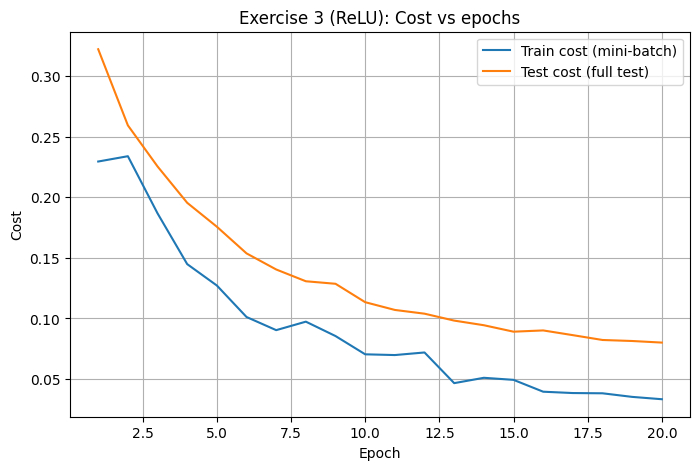

In [36]:
plt.figure(figsize=(8,5))
epochs = np.arange(1, len(hist_relu["train_costs"]) + 1)

plt.plot(epochs, hist_relu["train_costs"], label="Train cost (mini-batch)")
plt.plot(epochs, hist_relu["test_costs"], label="Test cost (full test)")

plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Exercise 3 (ReLU): Cost vs epochs")
plt.legend()
plt.grid(True)

plt.savefig("fig_relu_cost.png", dpi=200, bbox_inches="tight")
plt.show()

Exercise 3: ReLU accuracy plot (uses hist_relu

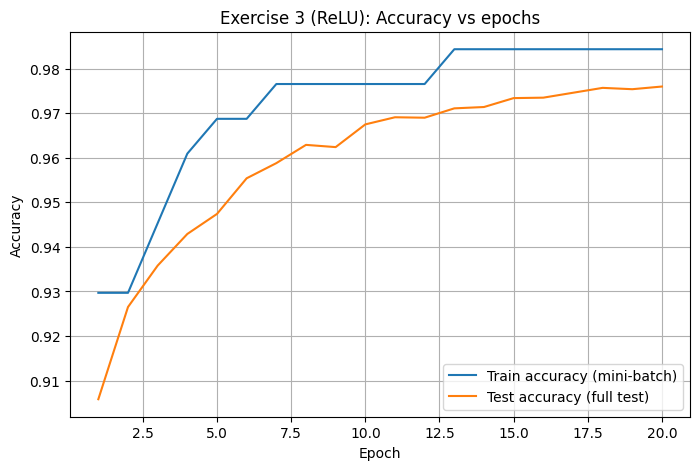

In [37]:
plt.figure(figsize=(8,5))
epochs = np.arange(1, len(hist_relu["train_accs"]) + 1)

plt.plot(epochs, hist_relu["train_accs"], label="Train accuracy (mini-batch)")
plt.plot(epochs, hist_relu["test_accs"], label="Test accuracy (full test)")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Exercise 3 (ReLU): Accuracy vs epochs")
plt.legend()
plt.grid(True)

plt.savefig("fig_relu_acc.png", dpi=200, bbox_inches="tight")
plt.show()


 Exercise 3: Sigmoid cost plot (uses hist_sig)

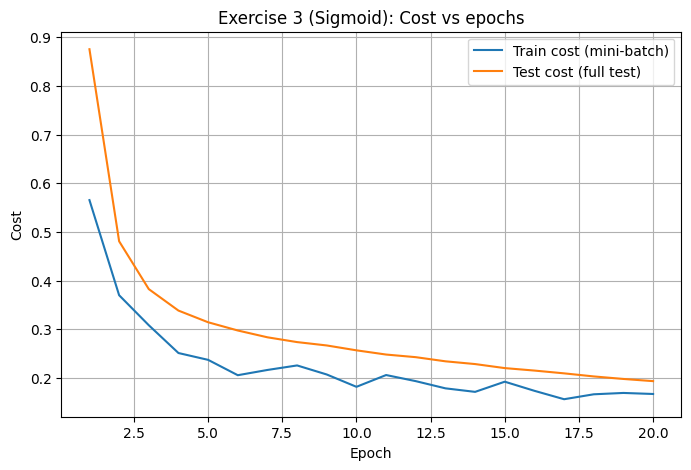

In [38]:
plt.figure(figsize=(8,5))
epochs = np.arange(1, len(hist_sig["train_costs"]) + 1)

plt.plot(epochs, hist_sig["train_costs"], label="Train cost (mini-batch)")
plt.plot(epochs, hist_sig["test_costs"], label="Test cost (full test)")

plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Exercise 3 (Sigmoid): Cost vs epochs")
plt.legend()
plt.grid(True)

plt.savefig("fig_sigmoid_cost.png", dpi=200, bbox_inches="tight")
plt.show()


Exercise 3: Sigmoid accuracy plot (uses hist_sig

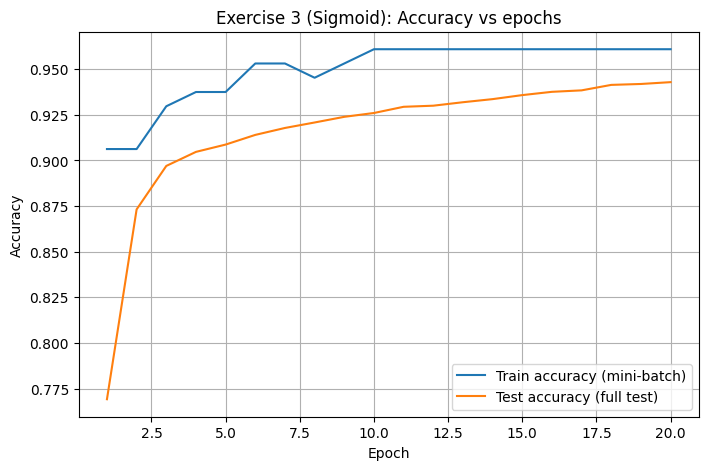

In [39]:
plt.figure(figsize=(8,5))
epochs = np.arange(1, len(hist_sig["train_accs"]) + 1)

plt.plot(epochs, hist_sig["train_accs"], label="Train accuracy (mini-batch)")
plt.plot(epochs, hist_sig["test_accs"], label="Test accuracy (full test)")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Exercise 3 (Sigmoid): Accuracy vs epochs")
plt.legend()
plt.grid(True)

plt.savefig("fig_sigmoid_acc.png", dpi=200, bbox_inches="tight")
plt.show()


In [40]:
!ls -lah fig_*.png


-rw-r--r-- 1 root root 97K Feb  6 20:49 fig_linear_acc.png
-rw-r--r-- 1 root root 85K Feb  6 20:43 fig_linear_cost.png
-rw-r--r-- 1 root root 87K Feb  6 21:32 fig_relu_acc.png
-rw-r--r-- 1 root root 87K Feb  6 19:41 fig_relu_accuracy.png
-rw-r--r-- 1 root root 85K Feb  6 20:56 fig_relu_cost.png
-rw-r--r-- 1 root root 86K Feb  6 21:34 fig_sigmoid_acc.png
-rw-r--r-- 1 root root 86K Feb  6 21:33 fig_sigmoid_cost.png
-rw-r--r-- 1 root root 59K Feb  6 20:50 fig_weights.png
